In [71]:
import pandas as pd

df = pd.read_csv("../data/first_4_games.csv")

df.head()

,time_frame,goals_for_avg,goals_against_avg,shots_on_target_%,crosses,poss_%,min_poss_to_score,pass_success_rate,num_pass_strings,avg_pass_string,atk_third_pass_success_%,mid_third_pass_success_%,def_third_pass_success_%
0,0-15,0.5,0.0,87.5,2.3,56.9,11:12,86,9.5,5.4,76,87,92
1,16-30,0.3,0.0,100.0,1.5,55.2,20:57,86,10.0,4.9,79,87,88
2,31-45,0.3,0.3,60.0,0.5,50.7,15:05,81,5.3,5.0,68,82,83
3,46-60,0.8,0.0,80.0,0.8,54.6,6:53,80,7.3,4.7,79,80,81
4,61-75,0.3,0.3,62.5,1.0,54.9,20:01,81,6.0,4.5,75,82,82


In [72]:
# convert minutes column to seconds
df[['minutes', 'seconds']] = df['min_poss_to_score'].str.split(
    ':', expand=True)

df['minutes'] = [int(minutes) for minutes in df['minutes']]
df['seconds'] = [int(seconds) for seconds in df['seconds']]

df['sec_poss_to_score'] = df['minutes'] * 60 + df['seconds']

df = df.drop(['minutes', 'seconds', "min_poss_to_score"], axis=1)

df

,time_frame,goals_for_avg,goals_against_avg,shots_on_target_%,crosses,poss_%,pass_success_rate,num_pass_strings,avg_pass_string,atk_third_pass_success_%,mid_third_pass_success_%,def_third_pass_success_%,sec_poss_to_score
0,0-15,0.5,0.0,87.5,2.3,56.9,86,9.5,5.4,76,87,92,672
1,16-30,0.3,0.0,100.0,1.5,55.2,86,10.0,4.9,79,87,88,1257
2,31-45,0.3,0.3,60.0,0.5,50.7,81,5.3,5.0,68,82,83,905
3,46-60,0.8,0.0,80.0,0.8,54.6,80,7.3,4.7,79,80,81,413
4,61-75,0.3,0.3,62.5,1.0,54.9,81,6.0,4.5,75,82,82,1201
5,76-90,0.3,0.3,25.0,0.5,61.3,84,5.0,4.7,82,82,93,998


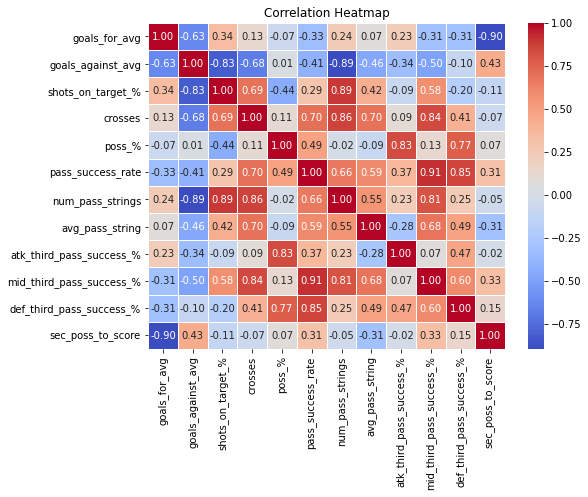

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
# interesting correlations:
# goals_for_avg, sec_poss_to_score
# num_pass_strings, goals_against avg
# shots on target, crosses
# shots on target, num_pass_strings
# shots on target, mid_third_pass_success_rate
# crosses, mid_third_success-rate
# num_pass_strings --> mid_third_pass_success
# attack rate success in pass scuess vs mid vs def

# seems like: controlling it very well in mid; not so much otherwise
# when we lose mid, we get score on the most

In [74]:
# correlation_matrix["goals_against_avg"]
correlation_matrix.sort_values(by="goals_against_avg", ascending=True)[
    "goals_against_avg"]
# , "goals_for_avg"]

num_pass_strings           -0.893269
shots_on_target_%          -0.830057
crosses                    -0.682323
goals_for_avg              -0.626099
mid_third_pass_success_%   -0.496139
avg_pass_string            -0.464991
pass_success_rate          -0.408248
atk_third_pass_success_%   -0.338960
def_third_pass_success_%   -0.104447
poss_%                      0.010555
sec_poss_to_score           0.432865
goals_against_avg           1.000000
Name: goals_against_avg, dtype: float64

In [75]:
df.columns

Index(['time_frame', 'goals_for_avg', 'goals_against_avg', 'shots_on_target_%',
       'crosses', 'poss_%', 'pass_success_rate', 'num_pass_strings',
       'avg_pass_string', 'atk_third_pass_success_%',
       'mid_third_pass_success_%', 'def_third_pass_success_%',
       'sec_poss_to_score'],
      dtype='object')

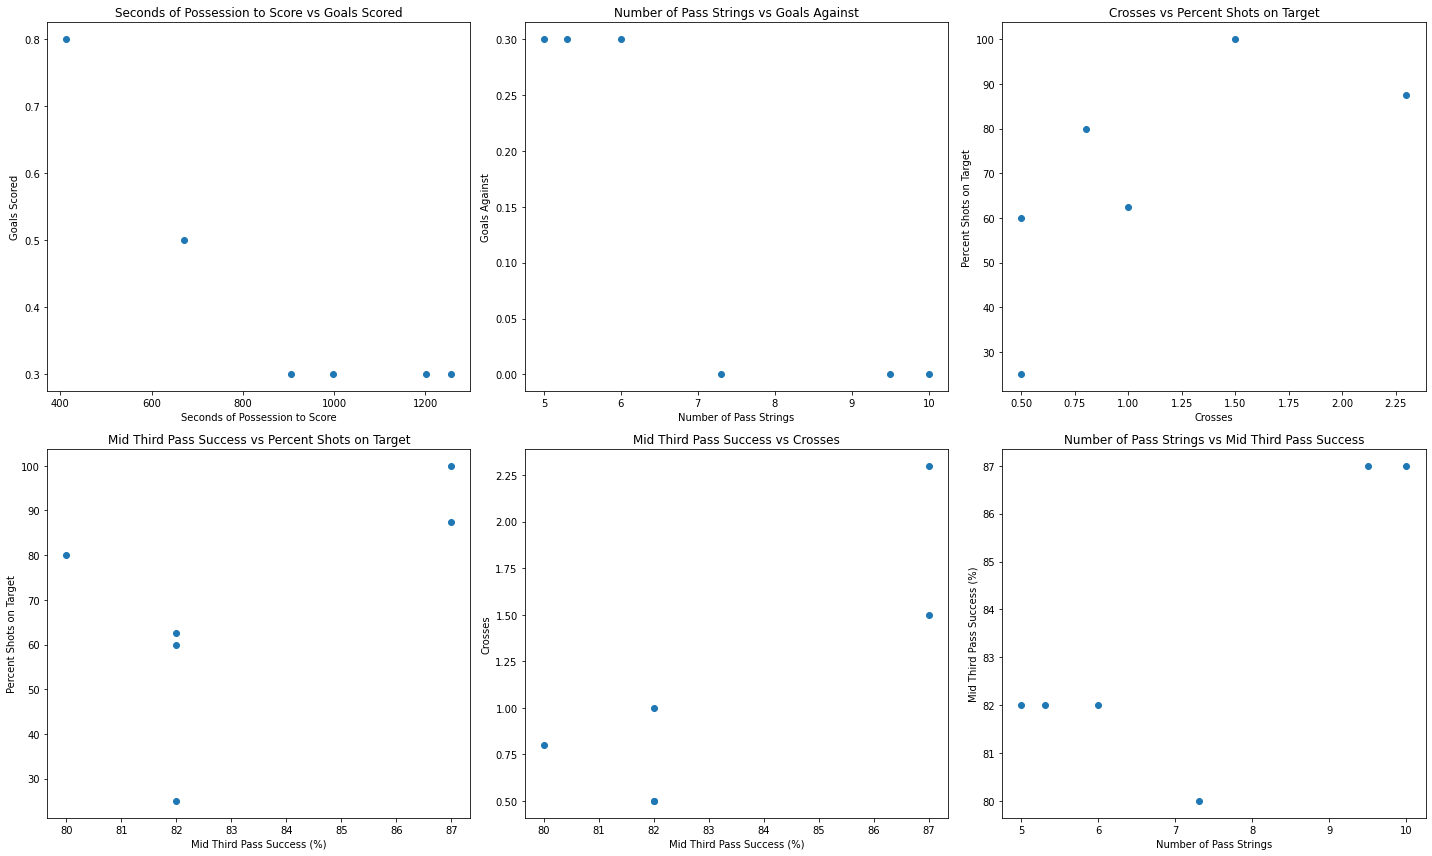

In [76]:
plt.figure(figsize=(20, 12))

# Scatterplot 1
plt.subplot(2, 3, 1)
plt.scatter(df['sec_poss_to_score'], df['goals_for_avg'])
plt.title('Seconds of Possession to Score vs Goals Scored')
plt.xlabel('Seconds of Possession to Score')
plt.ylabel('Goals Scored')

# Scatterplot 2
plt.subplot(2, 3, 2)
plt.scatter(df['num_pass_strings'], df['goals_against_avg'])
plt.title('Number of Pass Strings vs Goals Against')
plt.xlabel('Number of Pass Strings')
plt.ylabel('Goals Against')

# Scatterplot 3
plt.subplot(2, 3, 3)
plt.scatter(df['crosses'], df['shots_on_target_%'])
plt.title('Crosses vs Percent Shots on Target')
plt.xlabel('Crosses')
plt.ylabel('Percent Shots on Target')

# Scatterplot 4
plt.subplot(2, 3, 4)
plt.scatter(df['mid_third_pass_success_%'], df['shots_on_target_%'])
plt.title('Mid Third Pass Success vs Percent Shots on Target')
plt.xlabel('Mid Third Pass Success (%)')
plt.ylabel('Percent Shots on Target')

# Scatterplot 5
plt.subplot(2, 3, 5)
plt.scatter(df['mid_third_pass_success_%'], df['crosses'])
plt.title('Mid Third Pass Success vs Crosses')
plt.xlabel('Mid Third Pass Success (%)')
plt.ylabel('Crosses')

# Scatterplot 6
plt.subplot(2, 3, 6)
plt.scatter(df['num_pass_strings'], df['mid_third_pass_success_%'])
plt.title('Number of Pass Strings vs Mid Third Pass Success')
plt.xlabel('Number of Pass Strings')
plt.ylabel('Mid Third Pass Success (%)')

plt.tight_layout()
plt.show()

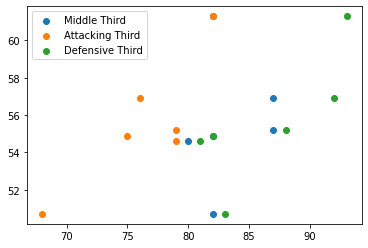

In [77]:
plt.scatter(df['mid_third_pass_success_%'],
            df['poss_%'], label="Middle Third")
plt.scatter(df['atk_third_pass_success_%'],
            df['poss_%'], label="Attacking Third")
plt.scatter(df['def_third_pass_success_%'],
            df['poss_%'], label="Defensive Third")

plt.title('')
plt.legend()
plt.show()
# plt.xlabel('Mid Third Pass Success (%)')
# plt.ylabel('Percent Shots on Target')

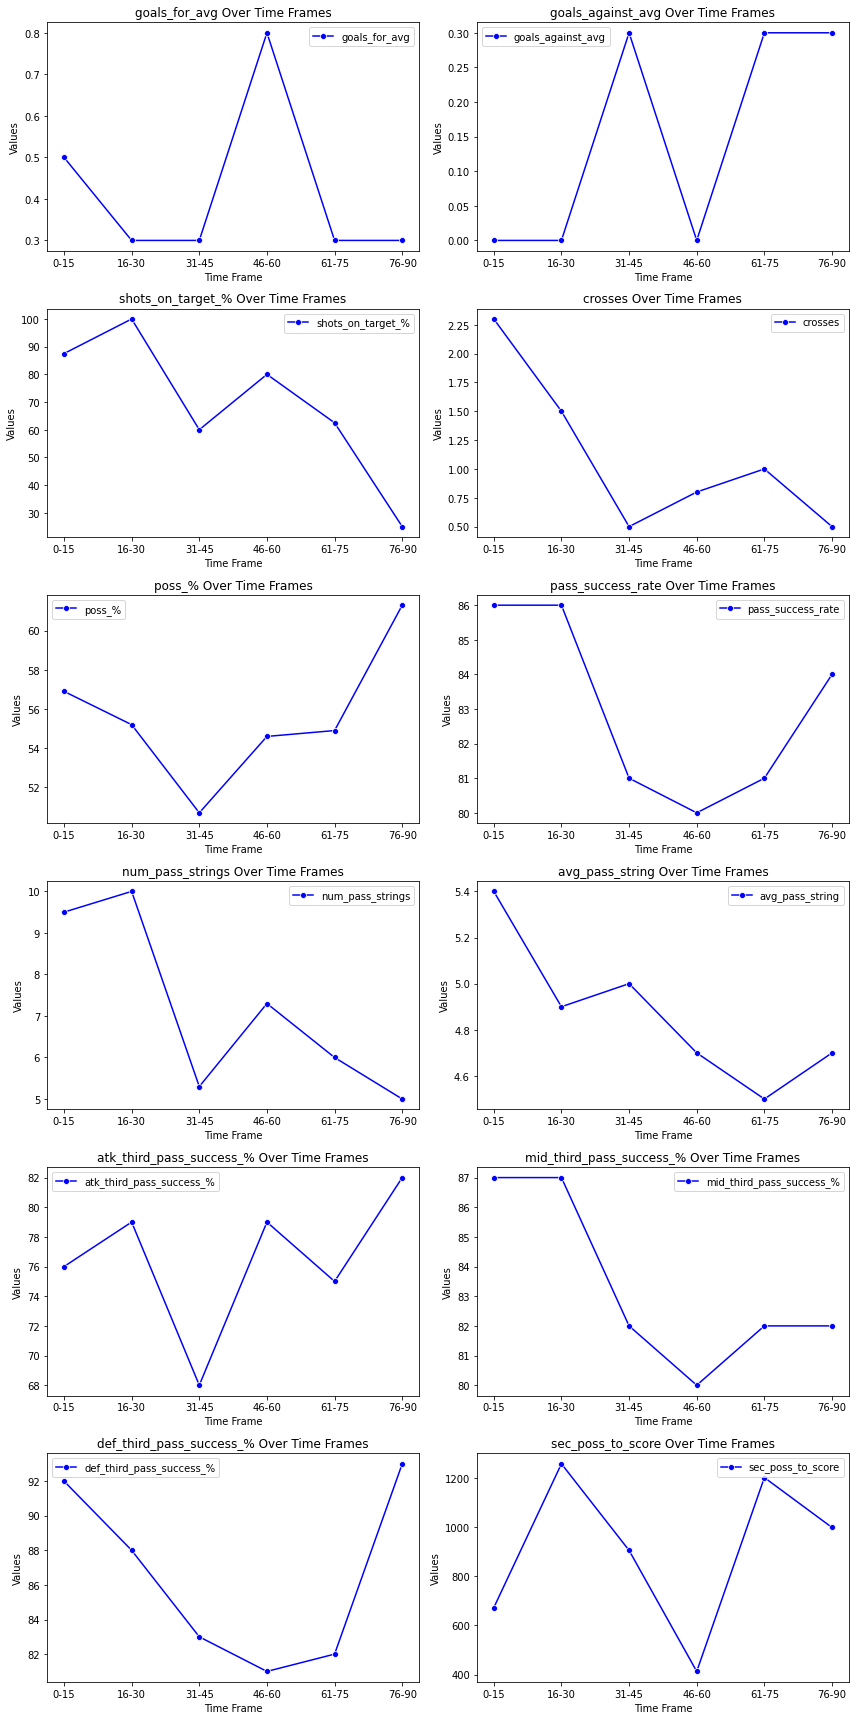

In [78]:

# Set the 'timeFrame' column as the index for better plotting
df_copy = df.set_index('time_frame', inplace=False)

# Draw line plots for each column against timeFrame
# plt.figure(figsize=(10, 12))

# Calculate the number of rows needed for subplots
num_features = len(df_copy.columns)
num_rows = (num_features + 1) // 2  # Ensure at least 1 row

# Create subplots with two plots per row
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, column in enumerate(df_copy.columns):
    sns.lineplot(data=df_copy[column], marker='o',
                 color='b', label=column, ax=axes[i])
    axes[i].set_title(f'{column} Over Time Frames')
    axes[i].set_xlabel('Time Frame')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Remove empty subplots if there are an odd number of features
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time in game')

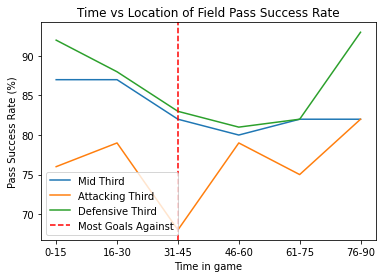

In [79]:
# tend to drop off at 31-45 minutes
plt.plot(df['time_frame'], df['mid_third_pass_success_%'],
         label="Mid Third")
plt.plot(df['time_frame'], df['atk_third_pass_success_%'],
         label="Attacking Third")
plt.plot(df['time_frame'], df['def_third_pass_success_%'],
         label="Defensive Third")
plt.axvline(x="31-45", color='r', linestyle='--',
            label='Most Goals Against')

plt.title('Time vs Location of Field Pass Success Rate')
plt.legend()
plt.ylabel('Pass Success Rate (%)')
plt.xlabel('Time in game')

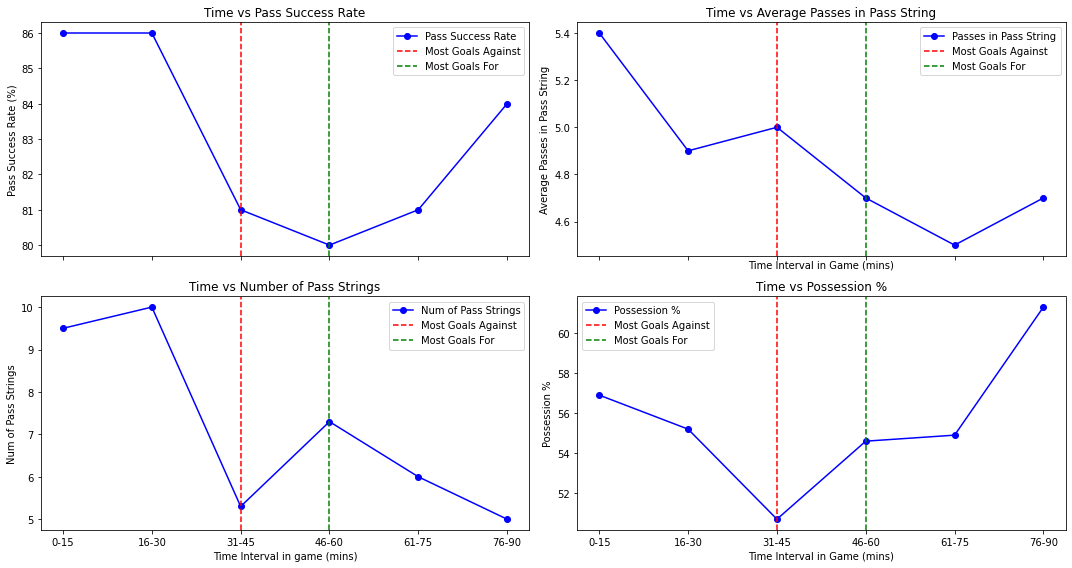

In [80]:
# tend to drop off at 31-45 minutes

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Plot Pass Success Rate
axes[0, 0].plot(df['time_frame'], df['pass_success_rate'],
                label="Pass Success Rate", marker='o', color='b')
axes[0, 0].set_title('Time vs Pass Success Rate')
axes[0, 0].set_ylabel('Pass Success Rate (%)')
axes[0, 0].axvline(x="31-45", color='r', linestyle='--',
                   label='Most Goals Against')
axes[0, 0].axvline(x="46-60", color='g', linestyle='--',
                   label='Most Goals For')
axes[0, 0].legend()

# Plot Num of Pass Strings
axes[1, 0].plot(df['time_frame'], df['num_pass_strings'],
                label="Num of Pass Strings", marker='o', color='b')
axes[1, 0].set_title('Time vs Number of Pass Strings')
axes[1, 0].set_ylabel('Num of Pass Strings')
axes[1, 0].set_xlabel('Time Interval in game (mins)')
axes[1, 0].axvline(x="31-45", color='r', linestyle='--',
                   label='Most Goals Against')
axes[1, 0].axvline(x="46-60", color='g', linestyle='--',
                   label='Most Goals For')
axes[1, 0].legend()

axes[0, 1].plot(df['time_frame'], df['avg_pass_string'],
                label="Passes in Pass String", marker='o', color='b')
axes[0, 1].set_title('Time vs Average Passes in Pass String')
axes[0, 1].set_ylabel('Average Passes in Pass String')
axes[0, 1].set_xlabel('Time Interval in Game (mins)')
axes[0, 1].axvline(x="31-45", color='r', linestyle='--',
                   label='Most Goals Against')
axes[0, 1].axvline(x="46-60", color='g', linestyle='--',
                   label='Most Goals For')
axes[0, 1].legend()

axes[1, 1].plot(df['time_frame'], df['poss_%'],
                label="Possession %", marker='o', color='b')
axes[1, 1].set_title('Time vs Possession %')
axes[1, 1].set_ylabel('Possession %')
axes[1, 1].set_xlabel('Time Interval in Game (mins)')
axes[1, 1].axvline(x="31-45", color='r', linestyle='--',
                   label='Most Goals Against')
axes[1, 1].axvline(x="46-60", color='g', linestyle='--',
                   label='Most Goals For')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

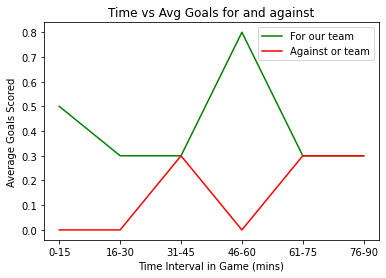

In [81]:
# ['time_frame', 'goals_for_avg', 'goals_against_avg', 'shots_on_target_%',
#    'crosses', 'poss_%', 'pass_success_rate', 'num_pass_strings',
#    'avg_pass_string', 'atk_third_pass_success_%',
#    'mid_third_pass_success_%', 'def_third_pass_success_%',
#    'sec_poss_to_score'],

plt.plot(df['time_frame'], df['goals_for_avg'],
         label="For our team", c="g")
plt.plot(df['time_frame'], df['goals_against_avg'],
         label="Against or team", c="r")

plt.title("Time vs Avg Goals for and against")
plt.xlabel("Time Interval in Game (mins)")
plt.ylabel("Average Goals Scored")
plt.legend()
plt.show()